In [4]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt 

In [5]:
orig = pd.read_excel("D://DataScience/Data/EastWestAirlines.xlsx",sheet_name='data')
print(orig.head(10))

   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   
5    6    16420           0          1          1          1            0   
6    7    84914           0          3          1          1        27482   
7    8    20856           0          1          1          1         5250   
8    9   443003           0          3          2          1         1753   
9   10   104860           0          3          1          1        28426   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000   

In [9]:
# Remove the first column
air=orig.iloc[:,1:]
air

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


### check for None values

In [10]:
air.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [12]:
import seaborn as sns

### Check for outliers and remove

<AxesSubplot:>

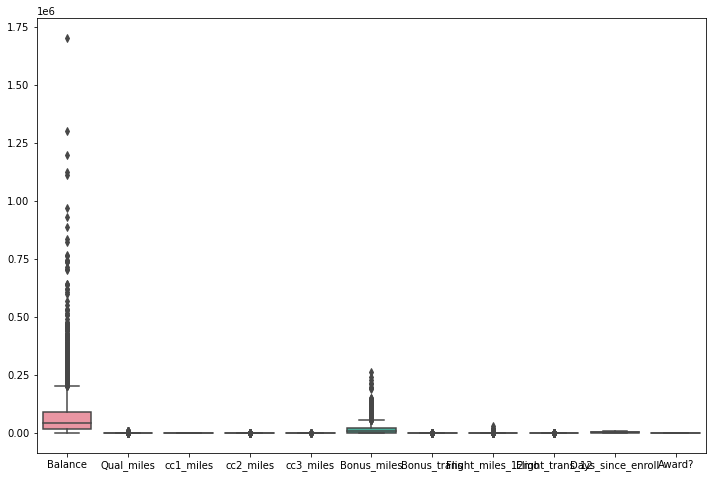

In [13]:
plt.figure(figsize=(12,8))
sns.boxplot(data=air)

<AxesSubplot:>

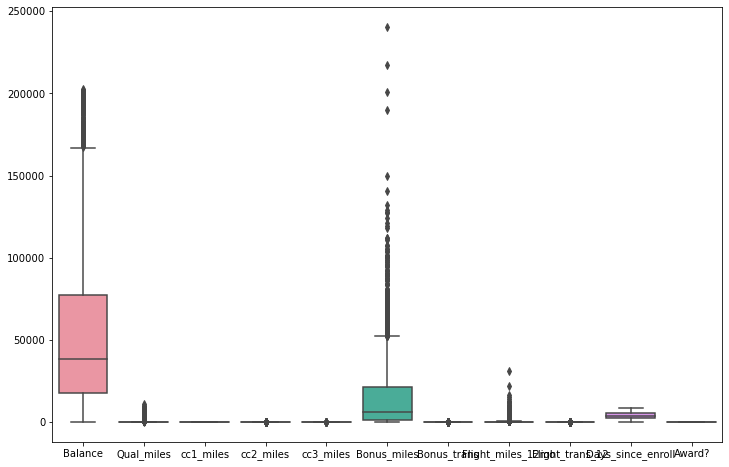

In [14]:
q1 = air['Balance'].quantile(0.25)
q3 = air['Balance'].quantile(0.75)
iqr = q3-q1
ul = q3 + (1.5*iqr)
ll = q1 - (1.5*iqr)
air1 = air[(air['Balance']>ll)&(air['Balance']<ul)]
plt.figure(figsize=(12,8))
sns.boxplot(data=air1)

<AxesSubplot:>

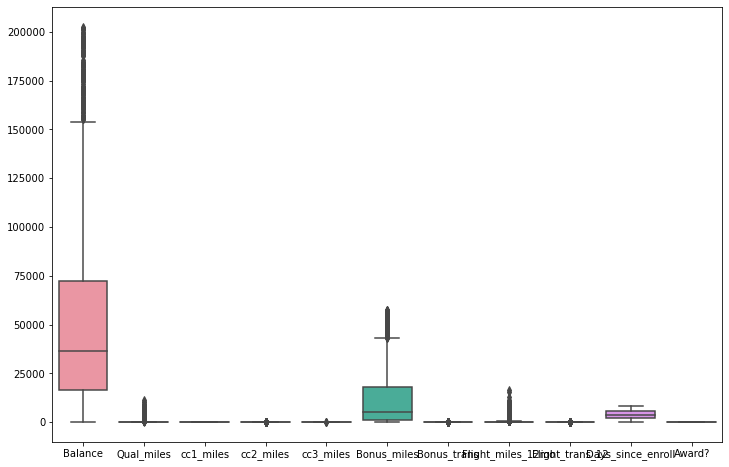

In [15]:
q1 = air['Bonus_miles'].quantile(0.25)
q3 = air['Bonus_miles'].quantile(0.75)
iqr = q3-q1
ul = q3 + (1.5*iqr)
ll = q1 - (1.5*iqr)
air2 = air1[(air1['Bonus_miles']>ll)&(air1['Bonus_miles']<ul)]
plt.figure(figsize=(12,8))
sns.boxplot(data=air2)

<AxesSubplot:>

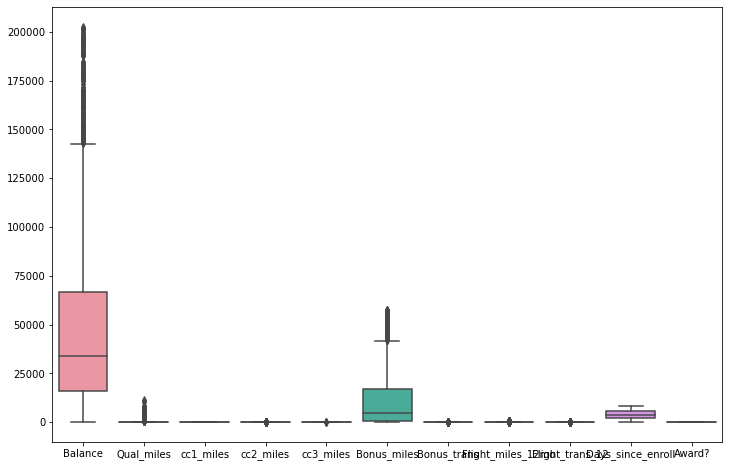

In [16]:
q1 = air['Flight_miles_12mo'].quantile(0.25)
q3 = air['Flight_miles_12mo'].quantile(0.75)
iqr = q3-q1
ul = q3 + (1.5*iqr)
ll = q1 - (1.5*iqr)
air3 = air2[(air2['Flight_miles_12mo']>ll)&(air2['Flight_miles_12mo']<ul)]
plt.figure(figsize=(12,8))
sns.boxplot(data=air3)

Could not remove outliers from Qual_miles. We will consider air3 as a dataset 

In [17]:
## Normalization
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
air5= pd.DataFrame(trans.fit_transform(air3))
print(air5.head(10))

         0    1     2    3    4         5     6         7      8         9   \
0  0.138672  0.0  0.00  0.0  0.0  0.003031  0.02  0.000000  0.000  0.843742   
1  0.094745  0.0  0.00  0.0  0.0  0.003745  0.04  0.000000  0.000  0.839884   
2  0.203884  0.0  0.00  0.0  0.0  0.071824  0.08  0.000000  0.000  0.847842   
3  0.072690  0.0  0.00  0.0  0.0  0.008710  0.02  0.000000  0.000  0.837955   
4  0.080805  0.0  0.00  0.0  0.0  0.000000  0.00  0.000000  0.000  0.836749   
5  0.418904  0.0  0.50  0.0  0.0  0.478747  0.50  0.000000  0.000  0.843019   
6  0.102702  0.0  0.00  0.0  0.0  0.091457  0.08  0.325945  0.125  0.836267   
7  0.197649  0.0  0.25  0.0  0.0  0.126786  0.20  0.000000  0.000  0.838799   
8  0.213894  0.0  0.25  0.0  0.0  0.194237  0.40  0.000000  0.000  0.834579   
9  0.212488  0.0  0.00  0.0  0.0  0.056756  0.12  0.000000  0.000  0.833856   

    10  
0  0.0  
1  0.0  
2  0.0  
3  0.0  
4  0.0  
5  0.0  
6  1.0  
7  0.0  
8  0.0  
9  0.0  


# Hierarchical Clustering

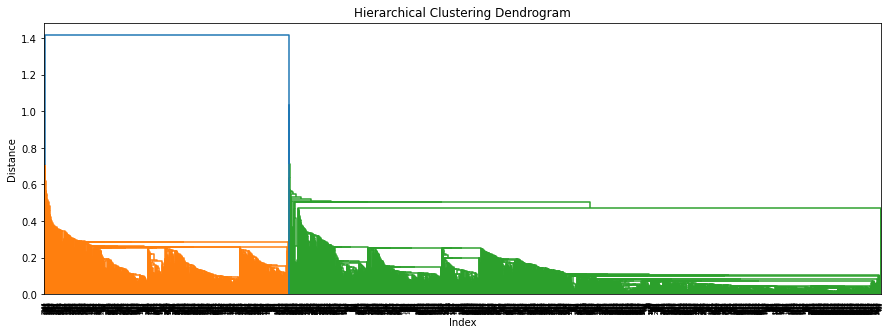

In [61]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(air5, method="single",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=0.,  # rotates the x axis labels
    #leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

Based on single linkage, 2 clusters can be formed

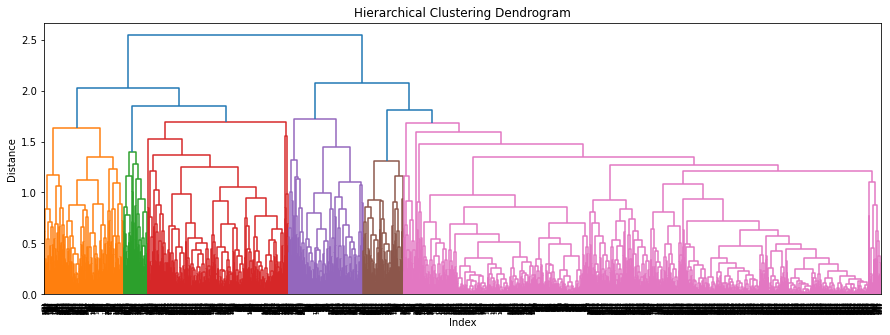

In [141]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(air5, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=0.,  # rotates the x axis labels
    #leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

Based on complete linkage, 4 clusters can be formed

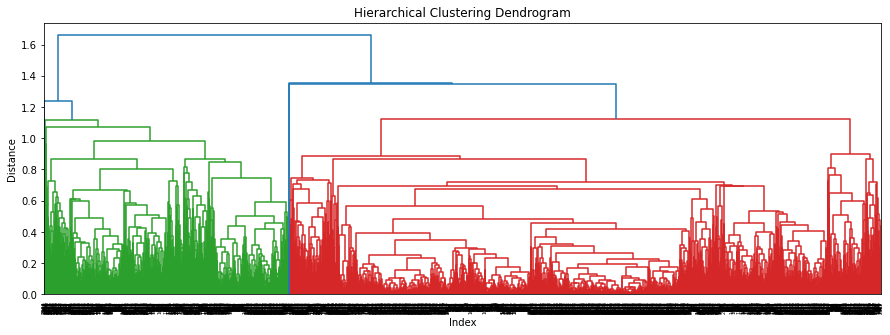

In [142]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(air5, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=0.,  # rotates the x axis labels
    #leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

Based on average linkage, 4 clusters can be formed

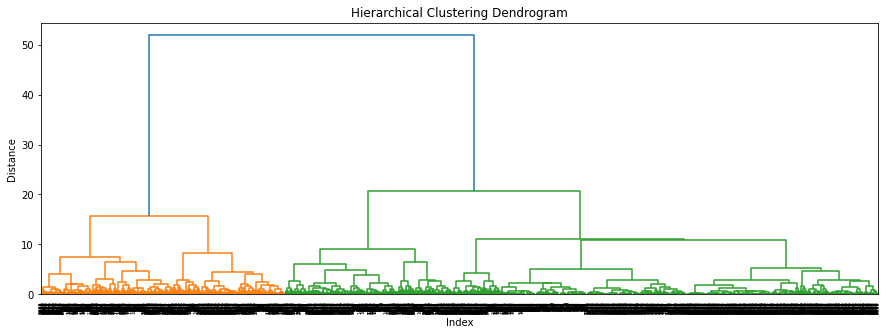

In [143]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(air5, method="ward",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=0.,  # rotates the x axis labels
    #leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

Based on ward linkage, 4 clusters can be formed

In [30]:
# Form Cluster and concatinate with original data set
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=2, linkage='single',affinity = "euclidean").fit(air5) 

single_labels=pd.Series(h_complete.labels_)
print("Clusters",'',single_labels.unique())
air5['clust_s']=single_labels # creating a  new column and assigning it to new column 
single_labels.value_counts()

Clusters  [0 1]


0    2809
1     296
dtype: int64

In [24]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=4, linkage='complete',affinity = "euclidean").fit(air5) 

comp_labels=pd.Series(h_complete.labels_)
print("Clusters",'',comp_labels.unique())
air5['clust_c']=comp_labels # creating a  new column and assigning it to new column 
comp_labels.value_counts()

Clusters  [2 1 0 3]


2    1922
0     611
3     296
1     276
dtype: int64

In [23]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=4, linkage='average',affinity = "euclidean").fit(air5) 

avg_labels=pd.Series(h_complete.labels_)
print("Clusters",'',avg_labels.unique())
air5['clust_a']=avg_labels # creating a  new column and assigning it to new column 
avg_labels.value_counts()

Clusters  [0 1 2 3]


0    1922
2     611
3     296
1     276
dtype: int64

In [28]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=4, linkage='ward',affinity = "euclidean").fit(air5) 

wrd_labels=pd.Series(h_complete.labels_)
print("Clusters",'',wrd_labels.unique())
air5['clust_w']=wrd_labels # creating a  new column and assigning it to new column 
wrd_labels.value_counts()

Clusters  [0 3 1 2]


0    1922
1     611
2     296
3     276
dtype: int64

In [42]:
air5.groupby(air5.clust_w).mean()

,0,1,2,3,4,5,6,7,8,9,10,clust_s,clust_c,clust_a
clust_w,,,,,,,,,,,,,,
0,0.184519,0.006685,0.072060,0.008585,0.000694,0.080775,0.141270,0.061034,0.026470,0.430167,0.0,0,2,0
1,0.206800,0.016561,0.172668,0.009002,0.000000,0.171898,0.202520,0.116807,0.050532,0.505094,1.0,0,0,2
2,0.349084,0.006901,0.707770,0.000000,0.000000,0.636613,0.360203,0.190198,0.069679,0.576535,1.0,1,3,3
3,0.527558,0.006320,0.662138,0.001812,0.001208,0.540291,0.335217,0.147077,0.043025,0.587601,0.0,0,1,1


## K means

In [45]:
## Normalization
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
air6= pd.DataFrame(trans.fit_transform(air3))
print(air6.head(10))

         0    1     2    3    4         5     6         7      8         9   \
0  0.138672  0.0  0.00  0.0  0.0  0.003031  0.02  0.000000  0.000  0.843742   
1  0.094745  0.0  0.00  0.0  0.0  0.003745  0.04  0.000000  0.000  0.839884   
2  0.203884  0.0  0.00  0.0  0.0  0.071824  0.08  0.000000  0.000  0.847842   
3  0.072690  0.0  0.00  0.0  0.0  0.008710  0.02  0.000000  0.000  0.837955   
4  0.080805  0.0  0.00  0.0  0.0  0.000000  0.00  0.000000  0.000  0.836749   
5  0.418904  0.0  0.50  0.0  0.0  0.478747  0.50  0.000000  0.000  0.843019   
6  0.102702  0.0  0.00  0.0  0.0  0.091457  0.08  0.325945  0.125  0.836267   
7  0.197649  0.0  0.25  0.0  0.0  0.126786  0.20  0.000000  0.000  0.838799   
8  0.213894  0.0  0.25  0.0  0.0  0.194237  0.40  0.000000  0.000  0.834579   
9  0.212488  0.0  0.00  0.0  0.0  0.056756  0.12  0.000000  0.000  0.833856   

    10  
0  0.0  
1  0.0  
2  0.0  
3  0.0  
4  0.0  
5  0.0  
6  1.0  
7  0.0  
8  0.0  
9  0.0  


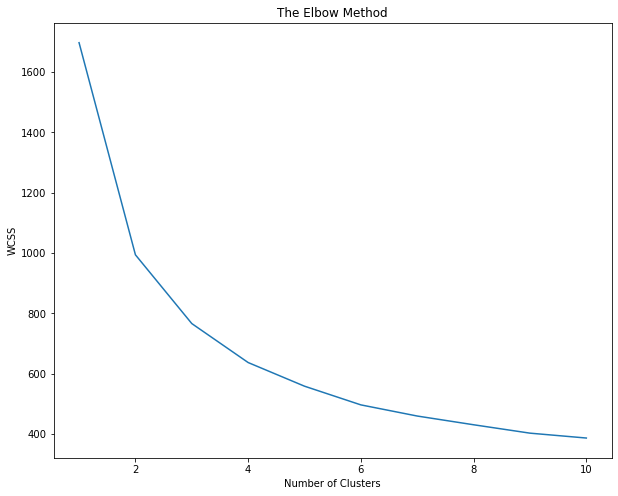

In [46]:
# Elbow curve to determine k values
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i,random_state=0)
    clf.fit(air6)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

In [47]:
from kneed import DataGenerator, KneeLocator
kl = KneeLocator(
    range(1, 11), WCSS, curve="convex", direction="decreasing"
)
kl.elbow

3

Based on above plot, k=3 is fine

In [48]:
from sklearn.cluster import KMeans
clusters_air=KMeans(3,random_state=42)
clusters_air.fit(air6)

KMeans(n_clusters=3, random_state=42)

In [49]:
cluster_klabels=pd.Series(clusters_air.labels_)
print("Clusters",'',cluster_klabels.unique())
air6['clust_k']=cluster_klabels # creating a  new column and assigning it to new column 
cluster_klabels.value_counts()

Clusters  [2 1 0]


2    1653
0     907
1     545
dtype: int64